<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM2/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Shiladitya (2348556)

In [435]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np
import math

In [436]:
df = pd.read_csv('/content/drive/MyDrive/ipynb/sem2/datasets/obesity.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


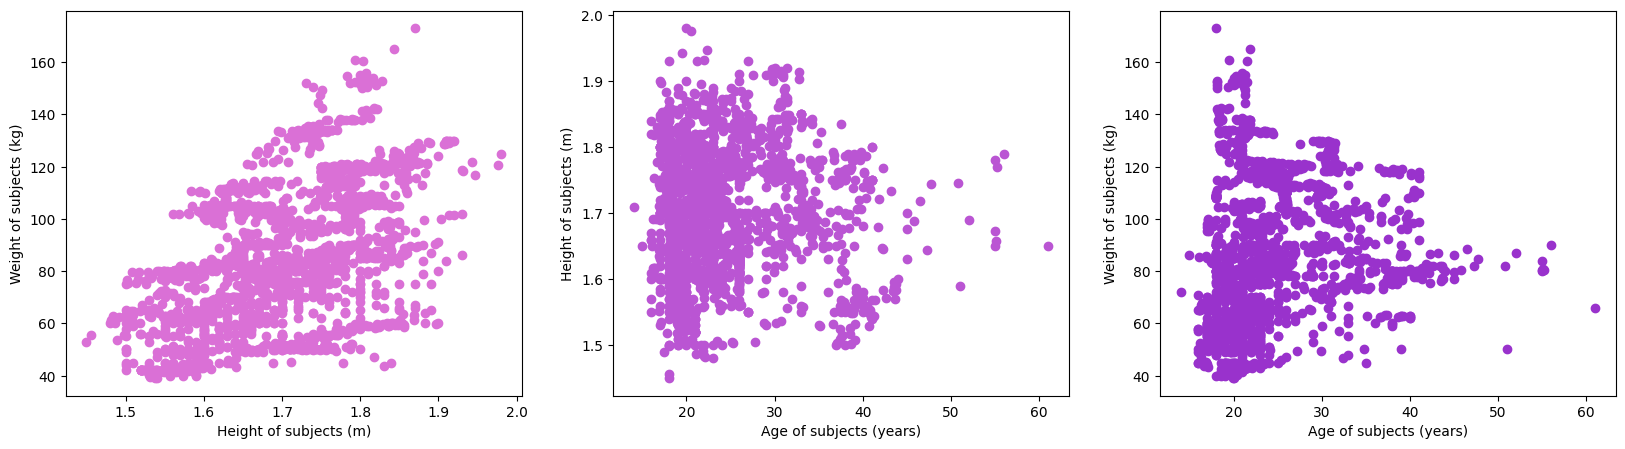

In [437]:
fig, ax = pt.subplots(1,3,figsize=(20,5))
ax[0].scatter(df['Height'], df['Weight'], color='orchid')
ax[0].set_xlabel('Height of subjects (m)')
ax[0].set_ylabel('Weight of subjects (kg)')
ax[1].scatter(df['Age'], df['Height'], color='mediumorchid')
ax[1].set_xlabel('Age of subjects (years)')
ax[1].set_ylabel('Height of subjects (m)')
ax[2].scatter(df['Age'], df['Weight'], color='darkorchid')
ax[2].set_xlabel('Age of subjects (years)')
ax[2].set_ylabel('Weight of subjects (kg)');

##Custom Implementation

In [438]:
class Cluster(object):
  def __init__(shila, x:pd.DataFrame, k:int=3, seed:bool=False):
    shila.k = k
    shila.x = x
    shila.exit = False
    shila.clusters = {}
    if seed:
      np.random.seed(6)
    centers = np.array(shila.x.sample(n=shila.k))
    c = -1
    for i in centers:
      c +=1
      center = i
      points = []
      cluster ={'center' : center, 'points' : [] }
      shila.clusters[c] = cluster
  @staticmethod
  def euclid(x1:int, x2:int):
    return math.dist(x1,x2)
  def assign_clusters(shila):
    for i in range(shila.x.shape[0]):
      dist = []
      curr_x = np.array(shila.x.iloc[i])
      for i in range(shila.k):
        dis = Cluster.euclid(curr_x,shila.clusters[i]['center'])
        dist.append(dis)
      curr_cluster = np.argmin(dist)
      shila.clusters[curr_cluster]['points'].append(curr_x)
    return shila.clusters
  def update_clusters(shila):
    for i in range(shila.k):
      points = np.array(shila.clusters[i]['points'])
      if points.shape[0] > 0:
        new_center = points.mean(axis=0)
        shila.clusters[i]['center'] = new_center
        shila.clusters[i]['points'] = []
    return shila.clusters
  def fit(shila):
    i = 0
    while(i<100):
      Cluster.assign_clusters(shila)
      Cluster.update_clusters(shila)
      i += 1
  def pred_cluster(shila):
    pred = []
    for i in range(shila.x.shape[0]):
      dist = []
      for j in range(shila.k):
        dist.append(Cluster.euclid(np.array(shila.x.iloc[i]),shila.clusters[j]['center']))
      pred.append(np.argmin(dist))
    return pred

In [439]:
def visualize(x:pd.DataFrame, pred):
  fig, ax = pt.subplots(1,3,figsize=(20,5))
  ax[0].scatter(x['Height'], x['Weight'], c=pred)
  ax[0].set_xlabel('Height of subjects (m)')
  ax[0].set_ylabel('Weight of subjects (kg)')
  ax[1].scatter(x['Age'], x['Height'], c=pred)
  ax[1].set_xlabel('Age of subjects (years)')
  ax[1].set_ylabel('Height of subjects (m)')
  ax[2].scatter(x['Age'], x['Weight'], c=pred)
  ax[2].set_xlabel('Age of subjects (years)')
  ax[2].set_ylabel('Weight of subjects (kg)');

In [440]:
x = df[['Height','Weight','Age']]

In [441]:
ob1 = Cluster(x, k=3)
ob2 = Cluster(x, k=5)
ob3 = Cluster(x, k=7)
ob1.fit()
ob2.fit()
ob3.fit()

###Results

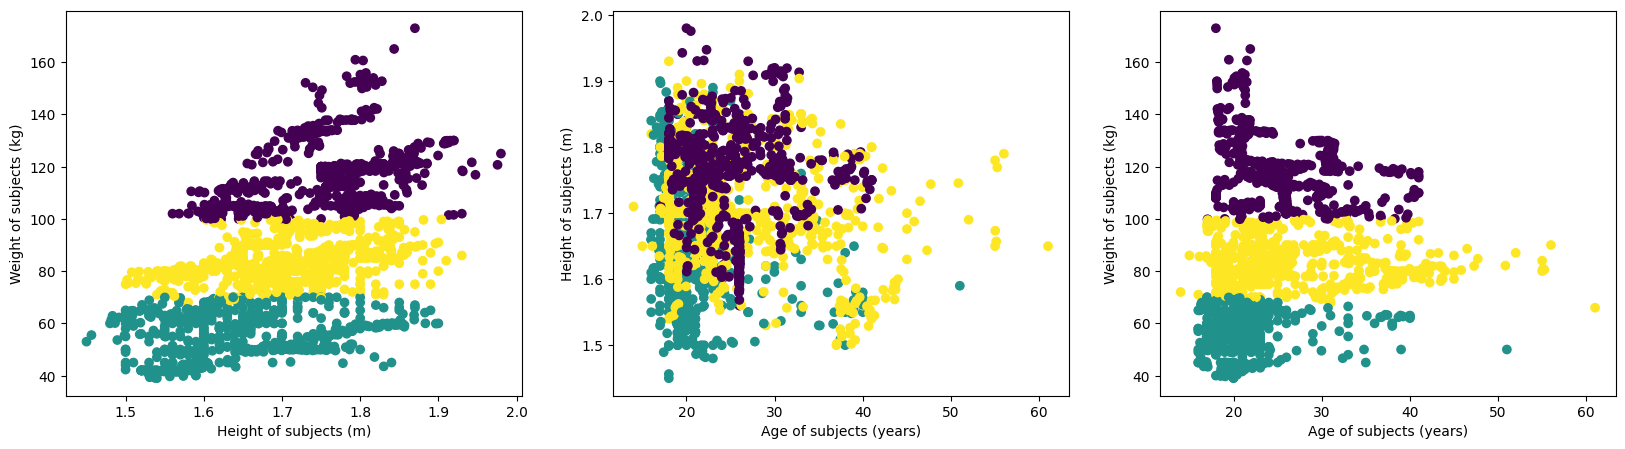

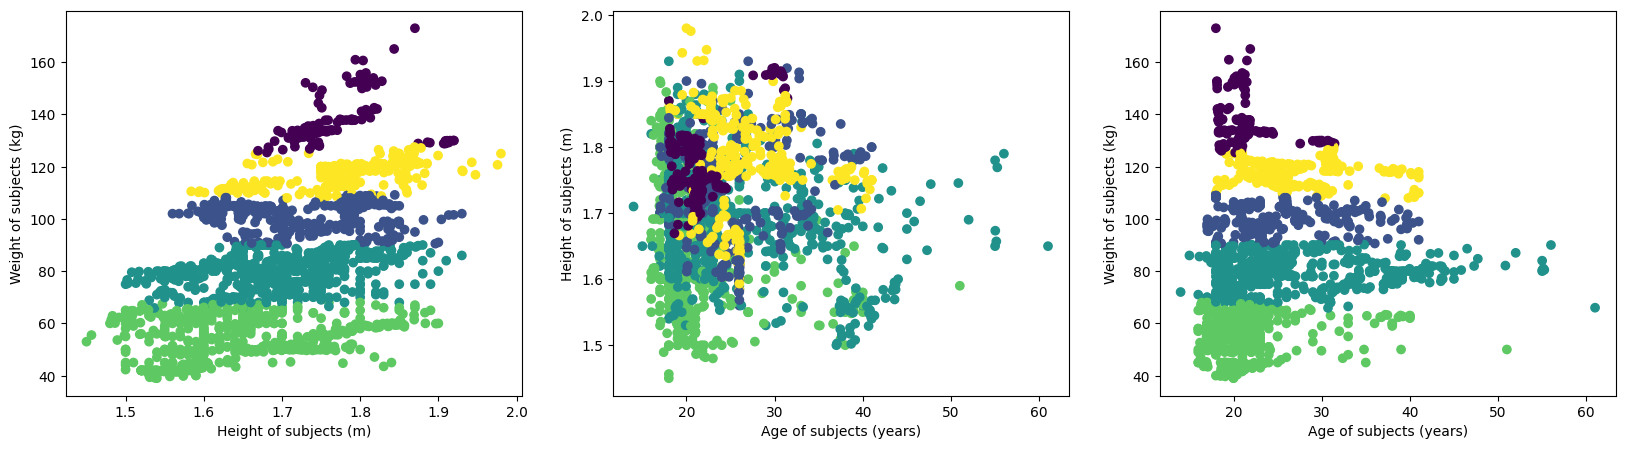

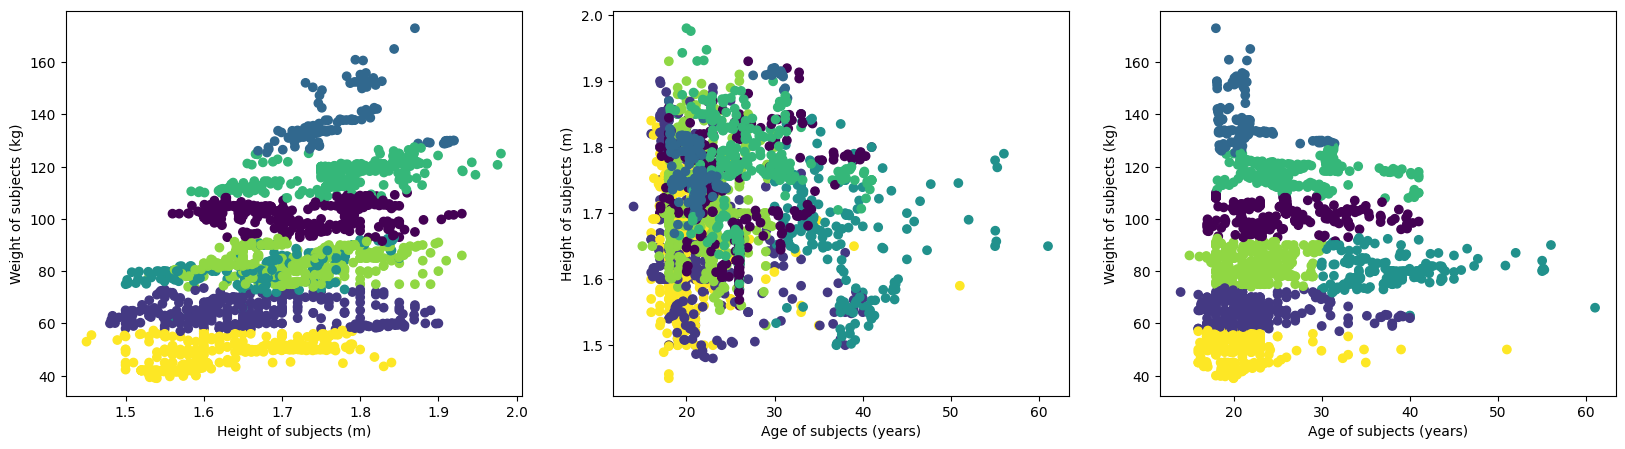

In [442]:
visualize(x,ob1.pred_cluster())
visualize(x,ob2.pred_cluster())
visualize(x,ob3.pred_cluster())

##Importing library to verify custom implementation

In [443]:
from sklearn.cluster import KMeans as km
k1 = km(n_clusters=3, n_init='auto')
k2 = km(n_clusters=5, n_init='auto')
k3 = km(n_clusters=7, n_init='auto')
k1.fit(x)
k2.fit(x)
k3.fit(x)

KMeans(n_clusters=7, n_init='auto')

###Results

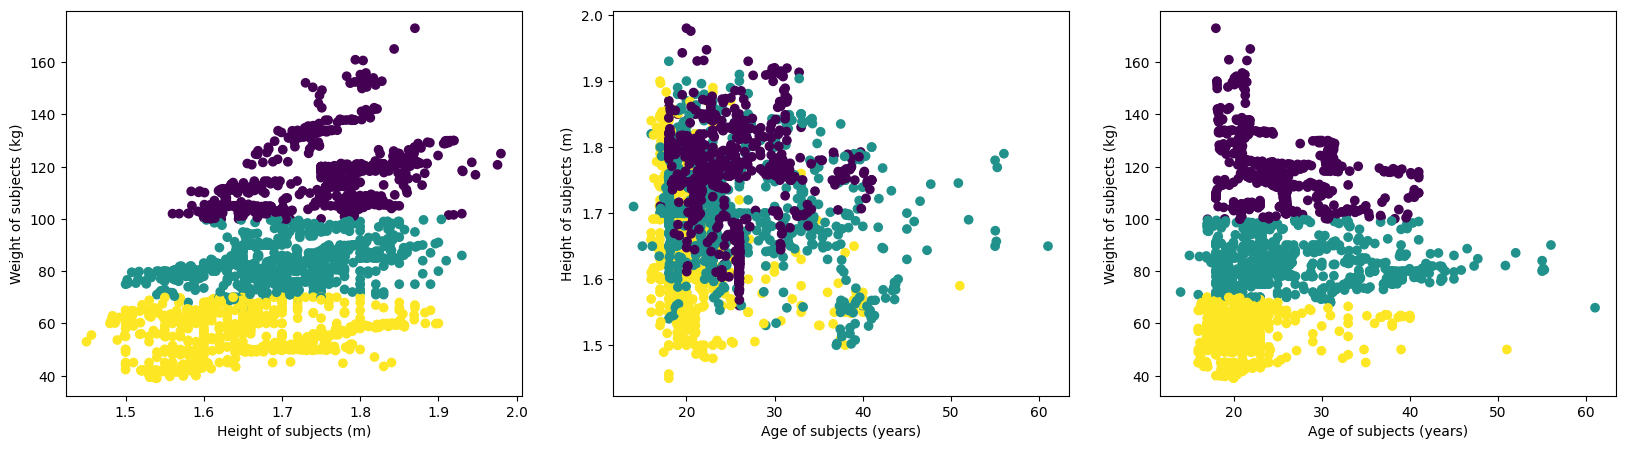

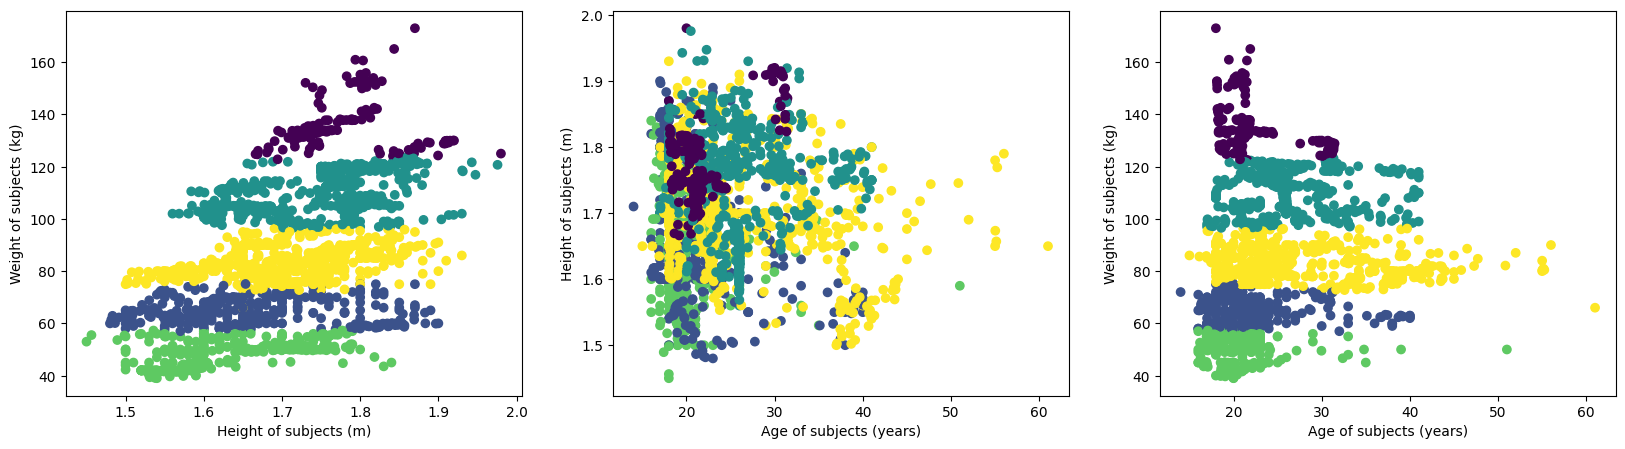

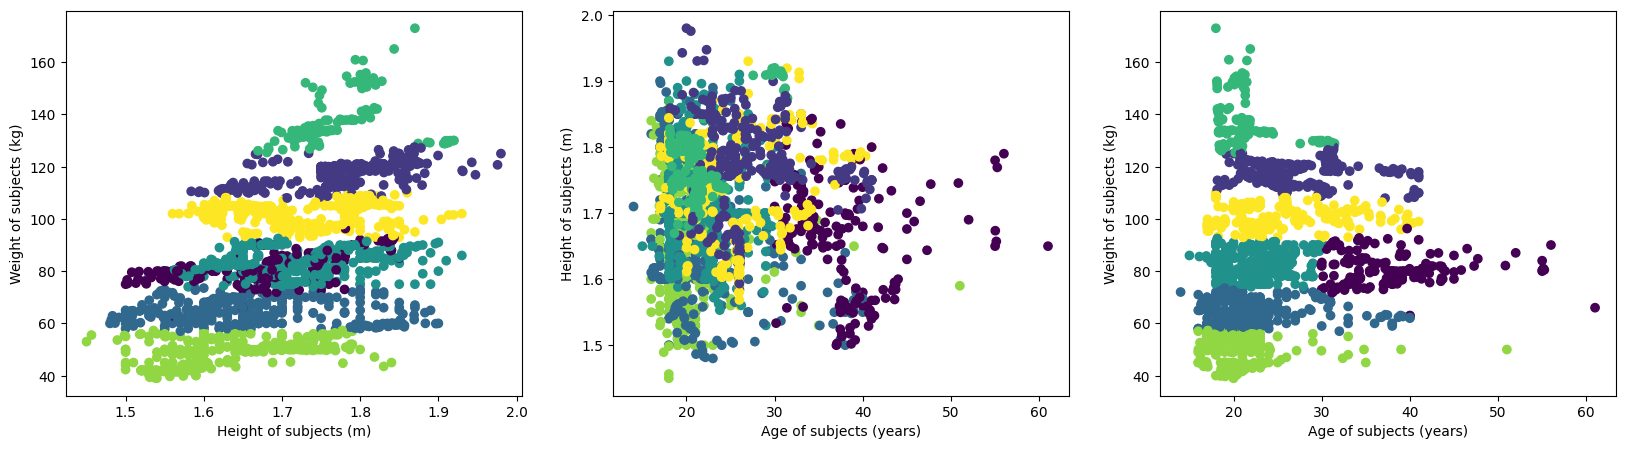

In [444]:
visualize(x,k1.labels_)
visualize(x,k2.labels_)
visualize(x,k3.labels_)